<a href="https://colab.research.google.com/github/qhz-23/lecture1/blob/main/Sec_1_Lecture_2_Logistic_Regression_Hanzhi_Qiu_20240117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Pull in Data and Convert ot Monthly

In [47]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("/content/gdrive/MyDrive/TaylorRuleData.csv", index_col = 0)

Mounted at /content/gdrive/


In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]
df.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


# 2.) Create columns.
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [50]:
# Difference in stockprice
df["Diff"] = df["Adj Close"].diff().shift(-1)

# Target up or down
df["Target"] = np.sign(df["Diff"])

# Option Premium
df["Premium"] = 0.08 * df["Adj Close"]

In [51]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006910,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [53]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [54]:
X = pd.read_csv("/content/gdrive/MyDrive/Xdata.csv",index_col="Date", parse_dates=["Date"])

In [55]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30", :].copy() # dataframe has to be cut

In [56]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [57]:
df["Predictions"] = y_pred

In [58]:
df

,Adj Close,Diff,Target,Premium,Predictions
Date,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0
1981-02-28,0.091546,-0.006910,-1.0,0.007324,-1.0
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0
...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0


In [60]:
df["Profits"] = 0.

# True Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]
# conditions for rows and columns: predictions and target both have to be correct and up

# False Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100 * df["Diff"] +  df["Premium"]

# True Negatives
# =0
df

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006910,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0,14.142246
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0,15.476284
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

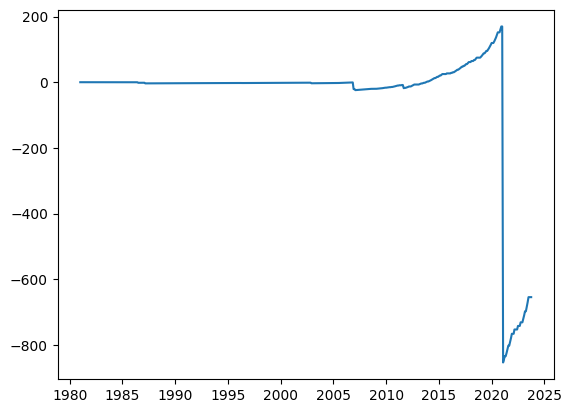

In [36]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

False positives pay out significantly less than our gain for being correct. We can observe a huge loss here in FY2020. As we can see, Covid is very horrible for this strategy - in previous years, we pick up small returns but when stuff goes wrong in 2020, the result is completely catastrophic.

In [ ]:
# 5.5.) Your skills from the MQE to help Mr. Lius ventures


Skills from MQE including data analysis and econometric modeling provide the ability to help Mr. Lius ventures make data-driven decisions, assess risks, and optimize operations in the fields of Bitcoin mining, US capital markets, and AI infrastructure. For example, we can use asset pricing models to price financial instruments, such as stocks and bonds. Forecasting techniques can also be employed to predict stock returns, volatility, and other market variables, which are fundamental in the world of finance.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.